Importing the Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Dataset

In [13]:
dataset = pd.read_csv("Position_Salaries.csv")
# get the second column only since we're already excluding the last column
x = dataset.iloc[:,1:-1].values

# dependant variable
y = dataset.iloc[:,-1].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Feature Scaling

In [14]:
# transform y into 2d array in order to use in training
y = y.reshape(len(y), 1) # reshape takes args rows, columns
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [15]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
# create a new scaler for the dependant variable
y = sc_y.fit_transform(y)
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the SVR model on the whole dataset

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(x,y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predicting a new result

In [18]:
# transform value back to the original scale
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))




array([170370.0204065])

Visualizing the SVR results

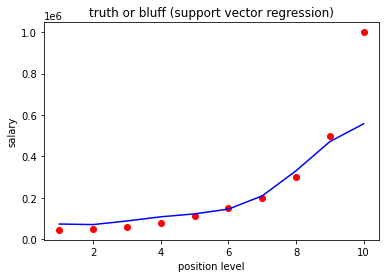

In [24]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color="red")
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color="blue")
plt.title("truth or bluff (support vector regression)" )
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()